<center><h1>Trabajo Practico de Labotatiro de Teoria De Circuitos II<h1/><center>

<h2>Grupo 5</h2>
<p>Integrantes:</p>

| Nombre | Apellido | Legajo |
| ---: | ---: | ---: |
| Dopazo | Sebastian | 155868-7|
| Pekerle Gatto | Fernando Miguel Marcelo | 147.294-0 |
| Mariscal Gutierrez | Juan Camilo | 137.666-4 |
| Viera | Mauro | 141.491-4 |
| Barreras Fauvety | Guillermo | 159.675-5 |


<h3>Consigna:</h3>
Implementar un filtro de máxima planicidad, Pasa Bajos, que tenga una frecuencia de corte de
50KHz y una atenuación de al menos 12dB a 100KHz.

1 y 2)
<br>
Al no darme el valor de $\alpha_{max}$ uso uno para que el orden del filtro me de aproximadamente 3
Presento los valores
$$f_p = 50khz$$
$$f_s = 100khz$$
$$\alpha_{max} = 1dB$$
$$\alpha_{min} = 12dB$$
<br>
Calculo el epsilon
$$|H(\omega)|^2 = \frac{1}{1+\epsilon^2\omega^{2n}}$$
$$\epsilon^2 = 10^{\frac{\alpha_{max}}{10}}-1$$
$$\boxed{\epsilon = 0,5088}$$
<br>
Calculo el n
$$ n = \frac{log(\frac{10^{\frac{\alpha_{min}}{10}}-1}{10^{\frac{\alpha_{max}}{10}}-1})}{2log(\omega_s)}$$
$$n = 2,92$$
$$\boxed{n = 3}$$
<br>

Normalizo
$$\omega_p = 100k\pi$$
$$\omega_s = 200k\pi$$
$$\omega_n = 100k\pi$$
$$\omega`_{p} = 2$$
$$\omega`_{s} = 1$$
$$\omega_{b} = \omega`_p.\epsilon^{-\frac{1}{n}}$$
$$\boxed{\omega_{b} = 1,2525}$$
<br>
$$Q = \frac{1}{2cos(60)} = 1$$


Procedo a dibujar la plantilla del filtro:
<br>
$$|T_n|^2 = \frac{1}{1+\epsilon^2\omega^{2n}}$$
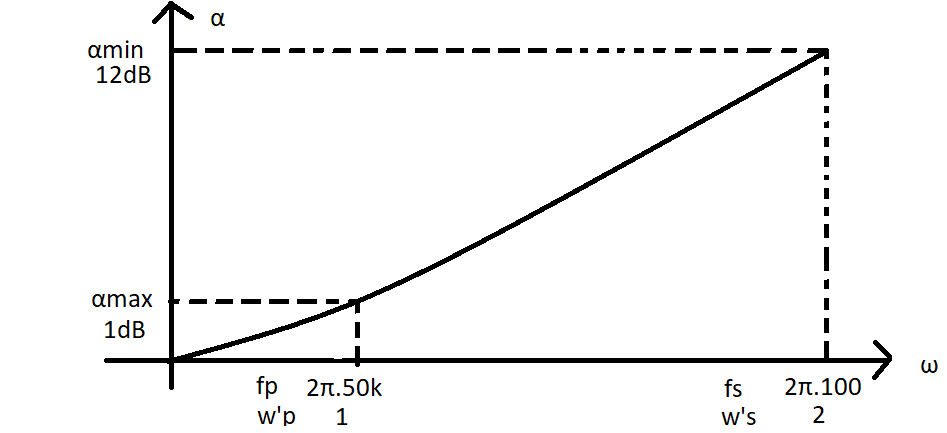

3)
Ecuacion de transferencia
<br>
$$H(S) = \frac{1}{[(\frac{S}{\omega_n.\omega_b})^2+(\frac{S}{Q.\omega_b\omega_n})+1]}.\frac{1}{[\frac{S}{\omega_b\omega_n}+1]}$$
$$H(S) = \frac{(\omega_b\omega_n)^2}{[(S^2+(S.\omega_b\omega_n)+(\omega_b\omega_n)^2]}.\frac{\omega_b\omega_n}{[S+\omega_b\omega_n]}$$
$$H(S) = \frac{(393,5k)^2}{[(S^2+(S.393,5k)+(393,5k)^2]}.\frac{393,5k}{[S+393,5k]}$$
<br>
Ecuacion de fase
$$ H(S) = \frac{\omega_0^2}{S^2 + S\omega_0 + \omega_0^2}.\frac{\omega_0}{S+\omega_0}$$
$$H(jw) = \frac{\omega_0^3}{(-\omega j\omega_0+\omega^2)(j\omega+\omega_0)}$$
$$H(jw) = \frac{\omega_0^3}{-j\omega^3-\omega^2\omega_0+j\omega\omega_0^2-\omega^2.\omega_0+j\omega\omega_0^2+\omega_0^3}$$
$$H(jw) = \frac{\omega_0^3}{-2\omega^2\omega_0+\omega_0^3+2j\omega\omega_0^2-j\omega^3}$$
$$|H(j\omega)| = \frac{\omega_0^3}{\sqrt{(-2\omega^2\omega_0+\omega_0^3)^2+(2\omega\omega_0^2-\omega^3)^2}}$$
$$\phi H(s) = arctag(\frac{Im(num)}{Re(num)}) - arctag(\frac{Im(num)}{Re(num)})$$
$$\phi H(s) = -arctag(\frac{2\omega\omega_0^2-\omega^3}{-2\omega^2\omega_0+\omega_0^3})$$

Ecuacion de retardo
$$\tau =  \sum \frac{\sigma_p}{\sigma_p^2 + (\omega \pm \omega_p)^2} - \sum \frac{\sigma_z}{\sigma_z^2 + (\omega \pm \omega_z)^2}$$
$$\tau = \frac{P_{RC}}{P_{RC}^2 + (\omega-\omega_p)^2} + \frac{P_1}{P_1^2 + (\omega-\omega_p)^2} + \frac{P_2}{P_2^2 + (\omega - \omega_p)^2}$$
$$\omega_0 = 393,5k$$
$$P_{RC} = (-393,5k;0)$$
$$P_{1} = (-196750;+340780,99j)$$
$$P_{2} = (-196750;-340780,99j)$$
$$\tau = \frac{393,5k}{393,5k^2 + \omega^2} + \frac{196750}{196750^2 + (\omega-340780,99)^2} + \frac{196750}{196750^2 + (\omega + 340780,99)^2}$$


4)
El diagramas de polos y ceros quedaria asi:
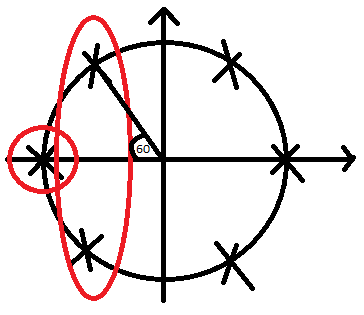

5)
<br>
Procedo a simular el circuito con python:

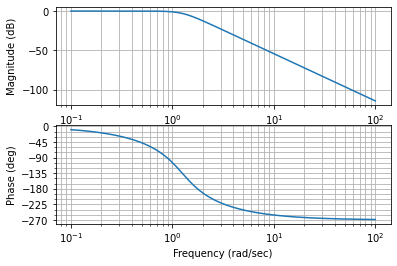

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ml
from scipy.signal import tf2zpk

num1 = np.array([1.5688])
den1 = np.array([1,1.2525,1.5688])
num2 = np.array([1.2525])
den2 = np.array([1,1.2525])
#zplane(num,den)
G1 = ml.tf(num1,den1)
G2 = ml.tf(num2,den2)
G = G1*G2
mag, phase, w = ml.bode(G)

plt.figure()


plt.show()

El circuito que usamos es el siguiente:
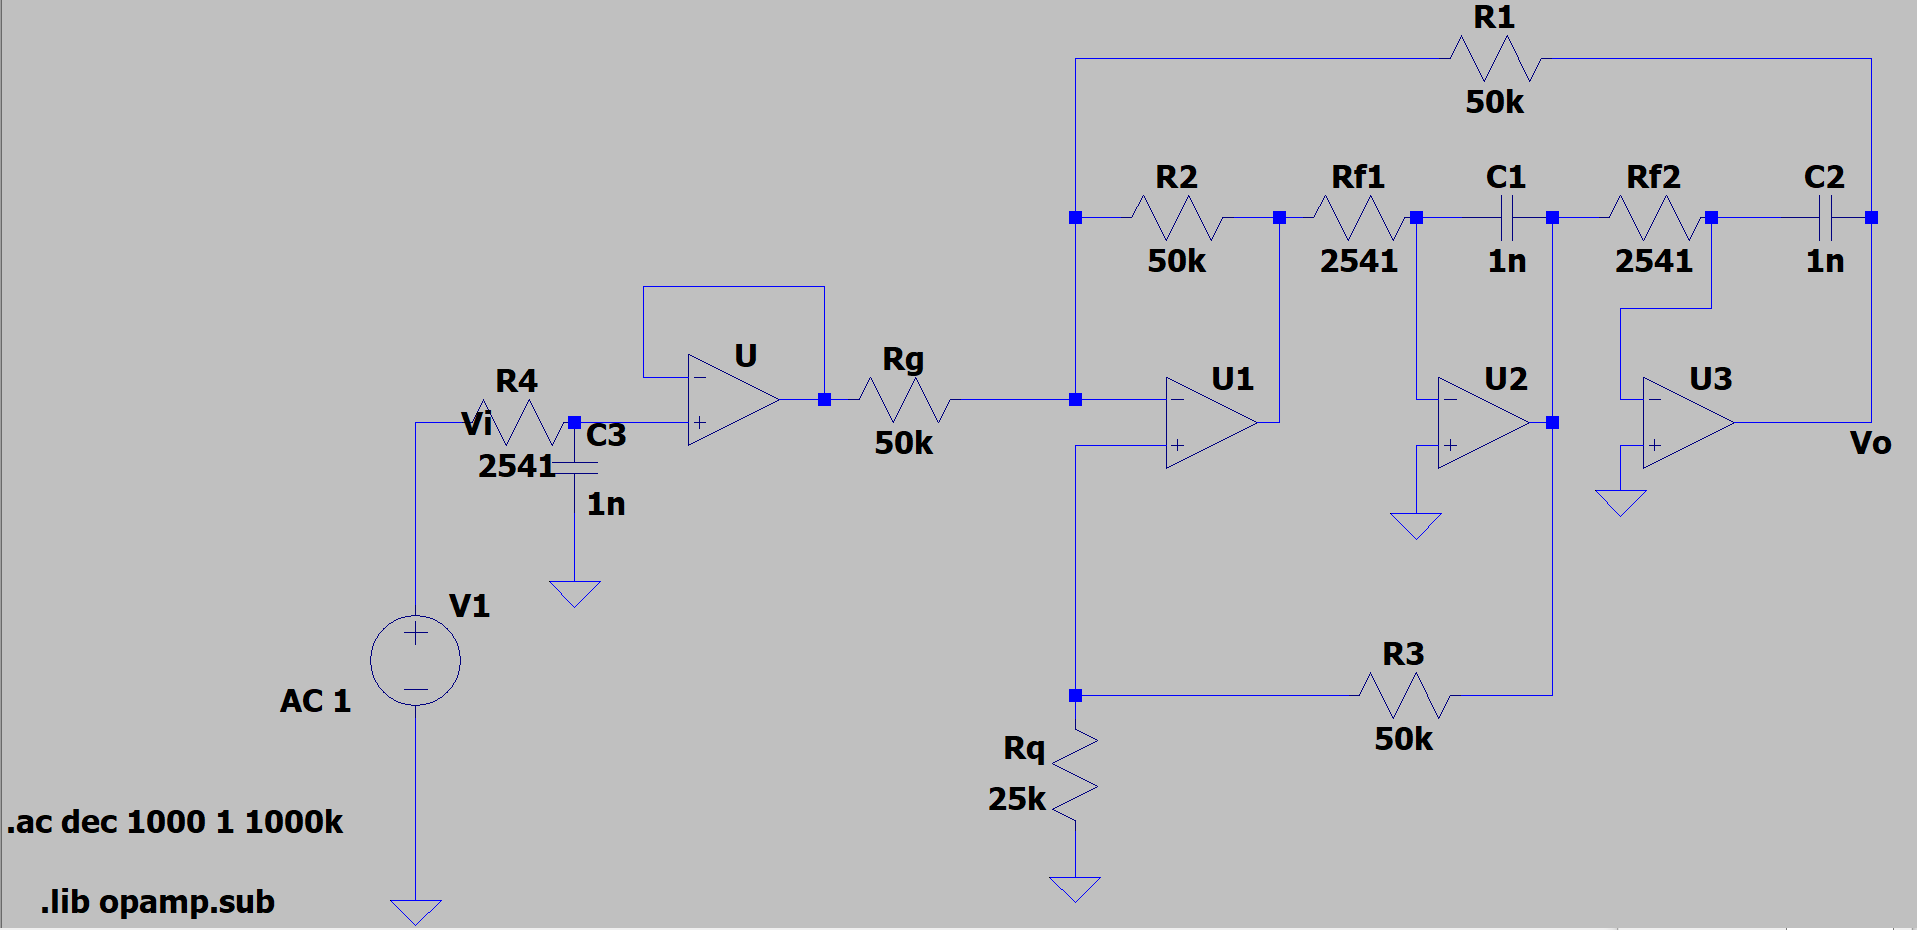

6)
Procedo a calcular los componentes de cada circuito planteando sus ecuaciones:
<br>
El khn tiene la siguiente transferencia:
$$H(S) = -\frac{R_1}{R_g}\frac{\frac{R_2}{C_2.C_1.R_{f2}.R_{f1}.R_1}}{[(S^2+S.\frac{1}{C_1.R_{f1}}\frac{R_q}{R_q+R_3}(\frac{R_2}{R_g}+\frac{R_2}{R_1} +1)+\frac{R_2}{C_2.C_1.R_{f2}.R_{f1}.R_1}]}$$
Tomo las siguientes presunciones:
$$R_{2}=R_1$$
$$R=R_{f2}=R_{f1}$$
$$C=C_{2}=C_1$$
Y la ecuacion queda de la siguiente manera:
$$H(S) = -\frac{R_1}{R_g}\frac{\frac{1}{C^2.R^2}}{[(S^2+S.\frac{1}{C.R}\frac{R_q}{R_q+R_3}(\frac{R_2}{R_g}+2)+\frac{1}{C^2.R^2}]}$$
Tomo un $k = 1$ por ende $R_g = R_2 = R_1$
Y le asigno valor
$$\boxed{R_g = R_2 = R_1 = 50k\Omega}$$
Procedo a calcular valores de componentes:
$$\omega_0^2 = (393,5k)^2 = \frac{1}{C^2R^2}$$
Si tomo que $\boxed{C = C_1 = C_2 = 1nf}$
$$R = \frac{1}{393,5k.C}$$
$$\boxed {R = R_{f1} = R_{f2} = 2541\Omega}$$
Valor comercial $\boxed{R = R_{f1} = R_{f2} = 2k7\Omega }$
<br>
$$Q = \frac{1}{\frac{R_q}{R_q+R_3}\frac{{R_2}}{{R_q}}+2}$$
$$Q = \frac{1}{3\frac{R_q}{R_q+R_3}}$$
$$1 = 3\frac{R_q}{R_q+R_3}$$
$$R_q+R_3 = 3R_q$$
$$R_3 = 2R_q$$
Tomo un $\boxed{R_3 = 50k\Omega}$
$$\boxed{R_q = 25k\Omega}$$
Para esta resistencia se uso 2 resitencias en paralelo de 51k 
$$R_q = 51k//51k = \frac {1}{\frac{1}{51k}+\frac{1}{51k}}$$ 
$$\boxed{R_q = 25k5\Omega }$$
<br>
El circuito pasabajos RC tiene la siguiente transferencia:
$$H(S) = \frac{\frac{1}{RC}}{S+\frac{1}{RC}}$$
Procedo a calcular los componentes
$$\omega_0 = 393,5k = \frac{1}{CR}$$
Si tomo que $\boxed{C = 1nf}$
$$R = \frac{1}{393,5k.C}$$
$$\boxed {R = 2541\Omega}$$
Valor comercial $\boxed{R = 2k7\Omega }$

7)
Procedo a simular el circuito con componentes ideales verificando que cumple con lo calculado:
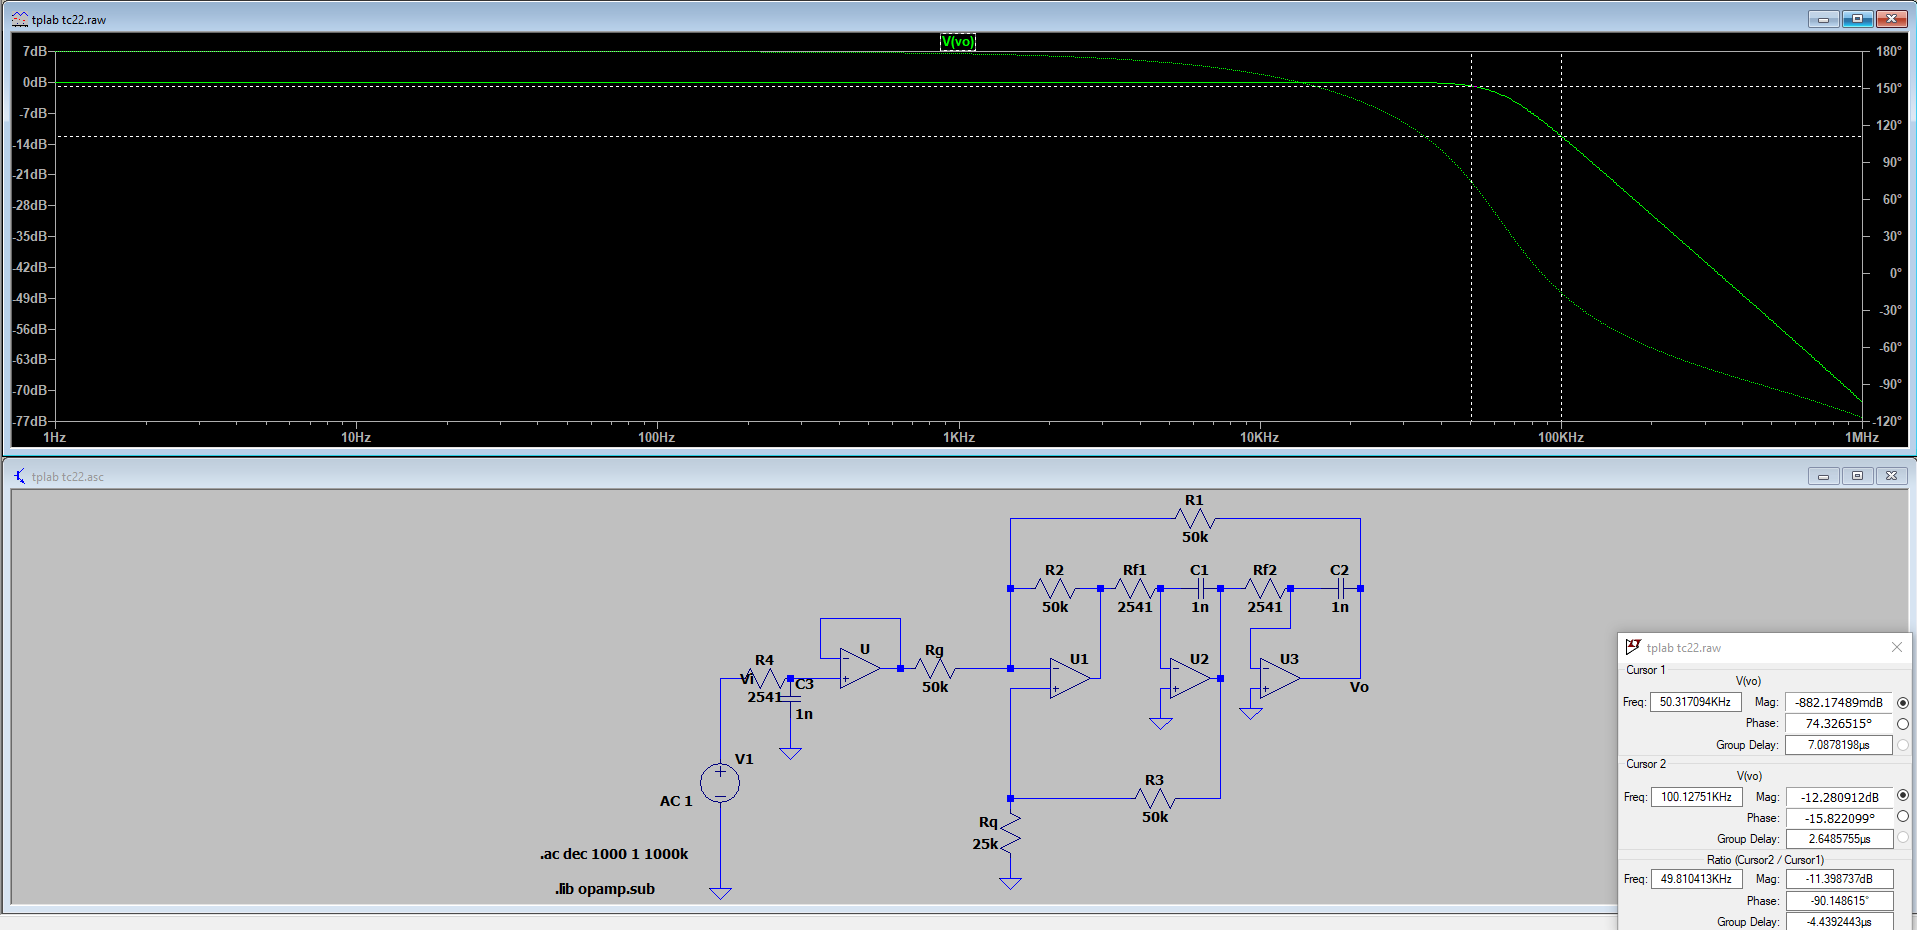Ahora lo simulamos con componentes reales:
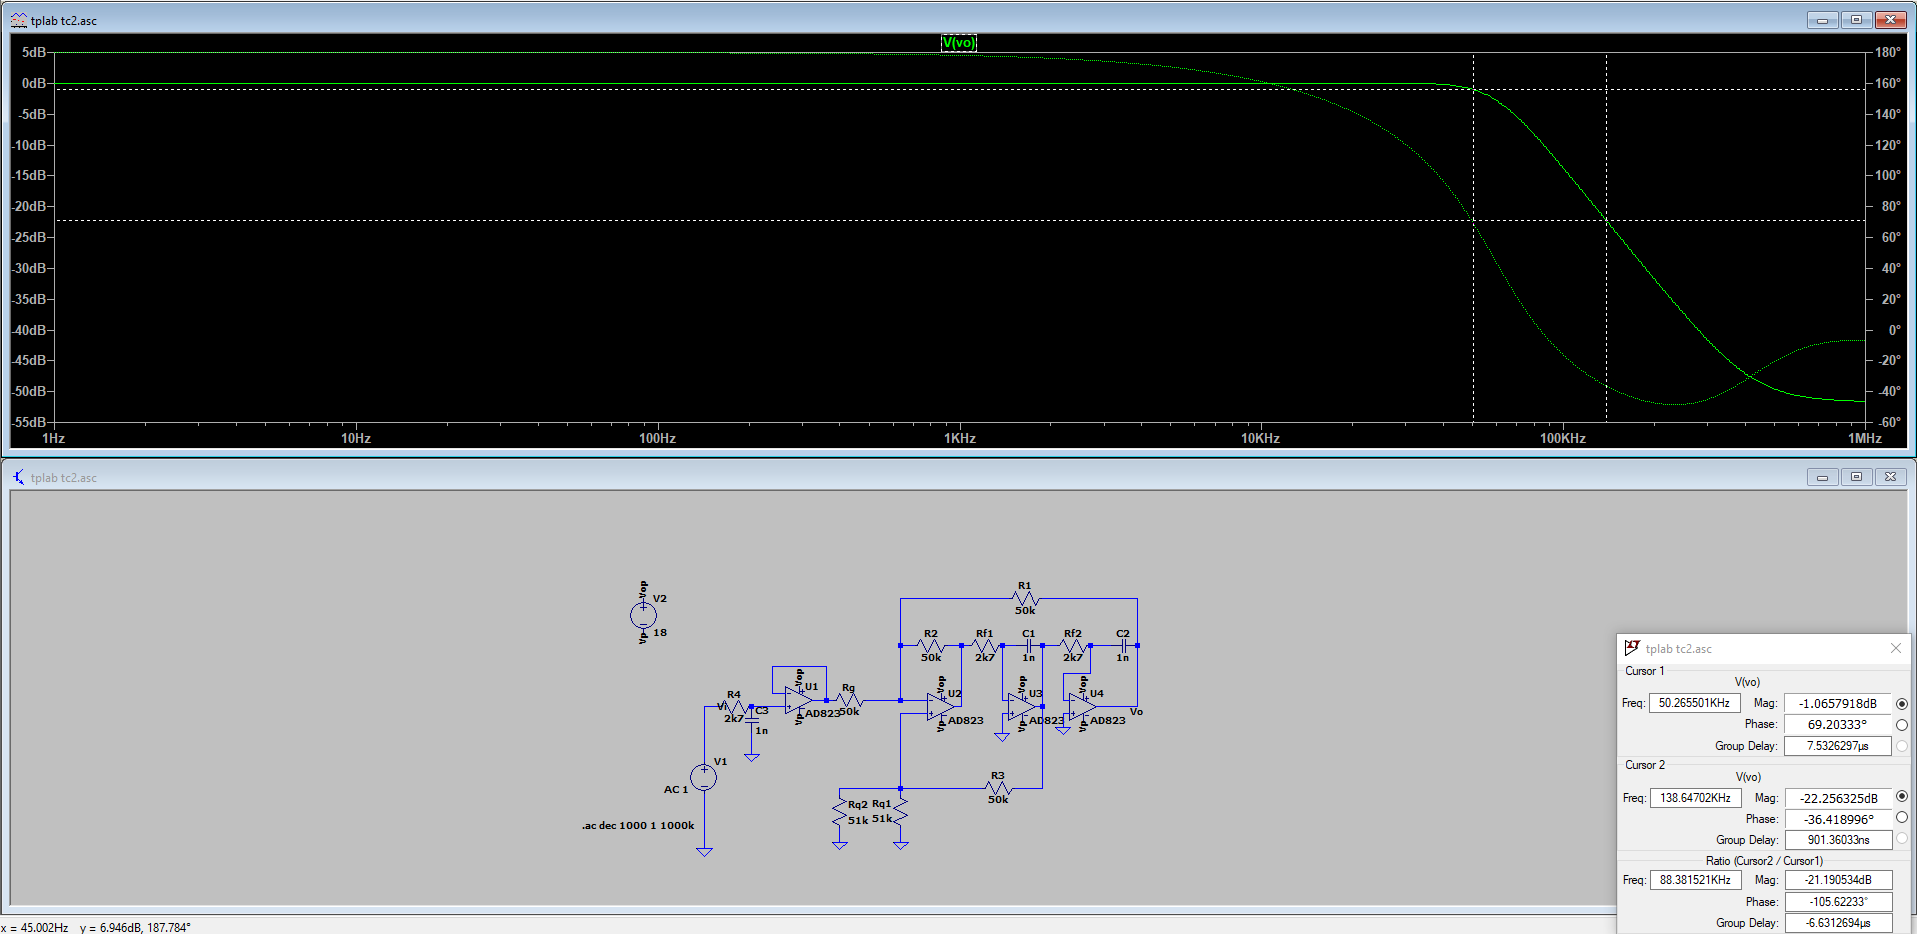

8) Se procedio a calcular el valor de la fase y la ganancia en funcion de los valores obtenidos mediante el uso de excel:
Datos obtenidos:
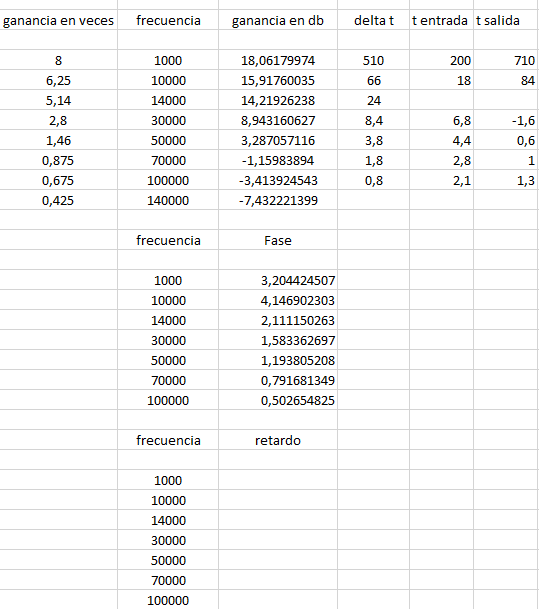
Aproximacion grafica, usando los valores medidos en el laboratorio:
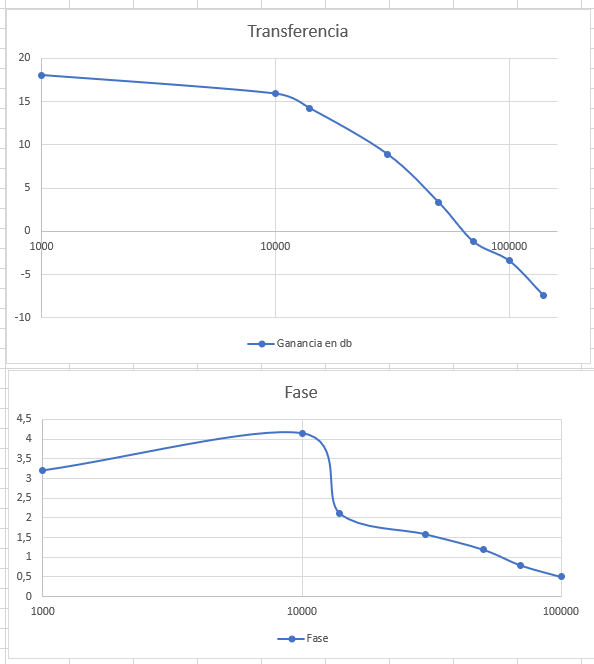

9)El diagrama de conexionado del circuito es el siguiente:
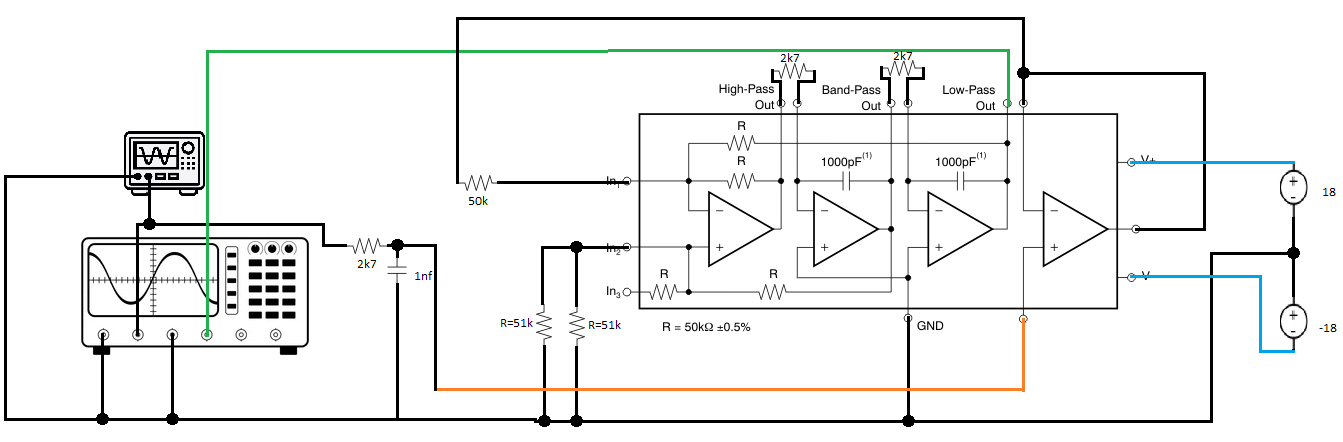